In [107]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [108]:
credit = pd.read_csv("german_credit.csv")
credit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [109]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [110]:
columns=["credit_history","present_emp_since","installment_as_income_perc","personal_status_sex","other_debtors",
            "present_res_since","property","other_installment_plans","credits_this_bank","people_under_maintenance","telephone",
            "foreign_worker"]
credit.drop(columns, inplace=True, axis=1)


In [111]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
default                 1000 non-null int64
account_check_status    1000 non-null object
duration_in_month       1000 non-null int64
purpose                 1000 non-null object
credit_amount           1000 non-null int64
savings                 1000 non-null object
age                     1000 non-null int64
housing                 1000 non-null object
job                     1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [112]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [113]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score

In [114]:
x,y = train_test_split(credit, test_size = 0.5, shuffle = True,random_state = 99)


In [115]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [116]:
# Print Shape of model data
x.shape

(500, 9)

In [117]:
credit = credit.merge(pd.get_dummies(credit.account_check_status, drop_first=True, prefix='account_check_status'), left_index=True, right_index=True)
credit = credit.merge(pd.get_dummies(credit.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)
credit = credit.merge(pd.get_dummies(credit.savings, drop_first=True, prefix='savings'), left_index=True, right_index=True)
credit = credit.merge(pd.get_dummies(credit.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)
credit = credit.merge(pd.get_dummies(credit.job, drop_first=True, prefix='job'), left_index=True, right_index=True)

In [118]:
del credit["account_check_status"]
del credit["purpose"]
del credit["savings"]
del credit["housing"]
del credit["job"]

### Check for highly correlated variables but don't required any treatment for this use case

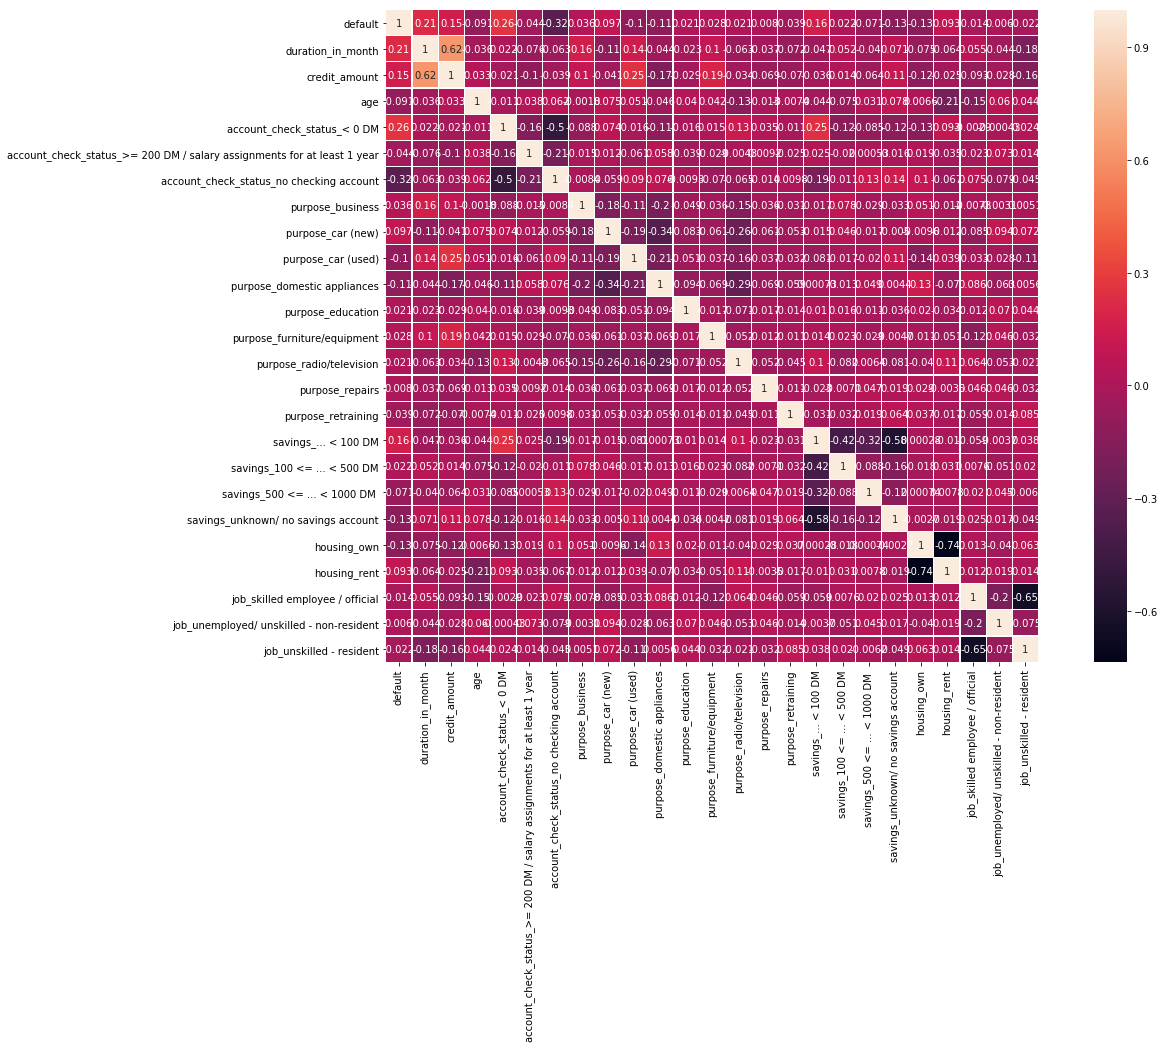

In [119]:
plt.figure(figsize=(20,12))
sns.heatmap(credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

### Drop the original variables which are converted to dummy

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [121]:
X = credit.drop('default', 1).values
y = credit["default"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=50)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [125]:
from sklearn.ensemble import RandomForestClassifier
Model1 = RandomForestClassifier(n_estimators=500,n_jobs=2,criterion="entropy",random_state=9999)

In [127]:
Model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [128]:
y_predict = Model1.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [129]:
accuracy_score(y_test,y_predict)

0.75

In [130]:
confusion_matrix(y_test, y_predict)

array([[187,  20],
       [ 55,  38]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

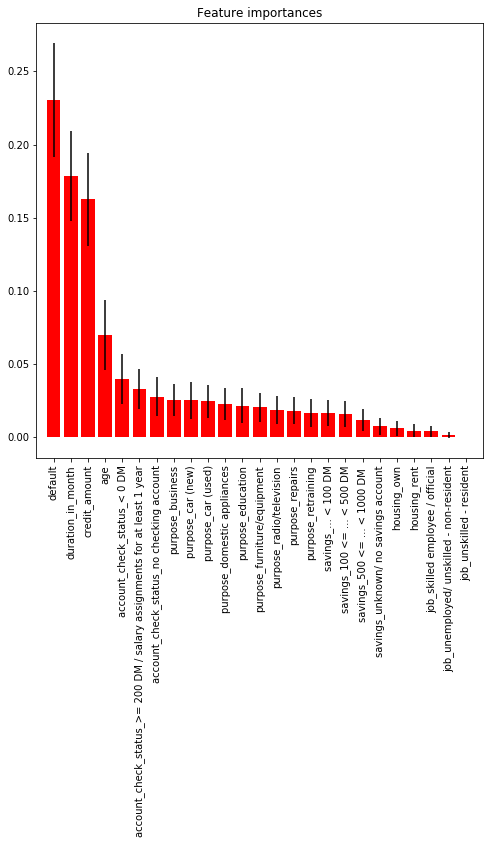

In [142]:
imp = Model1.feature_importances_
##plt.bar(range(len(Model1.feature_importances_)), Model1.feature_importances_)
##plt.show()
std = np.std([tree.feature_importances_ for tree in Model1.estimators_],
         axis=0)
indices = np.argsort(imp)[::-1]

plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), imp[indices],
   color="r", yerr=std[indices], align="center")
feature_names = credit.columns
plt.xticks(range(credit.shape[1]), feature_names)
plt.xticks(rotation=90)
plt.xlim([-1, credit.shape[1]])
plt.show()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [143]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [144]:
# Use below values
num_folds = 10
seed = 77

In [145]:
#Validate the Random Forest model build above using k fold

In [147]:
KCV = KFold(n_splits=num_folds, random_state=seed)
Model2 = cross_val_score(Model1, X_train, y_train, cv=KCV)

In [0]:
#Calculate Mean score

In [148]:
Model2.mean()

0.7442857142857143

In [0]:
# Calculate score standard deviation using std()

In [149]:
Model2.std()

0.03749829928116198

# Q8 Print the confusion matrix( 1 Marks)

In [159]:
confusion_matrix(y_test, y_predict)

array([[187,  20],
       [ 55,  38]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [160]:
from sklearn.metrics import classification_report

In [162]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.77      0.90      0.83       207
          1       0.66      0.41      0.50        93

avg / total       0.74      0.75      0.73       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

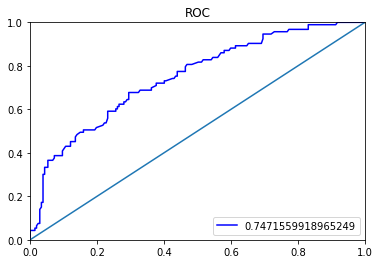

In [164]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

p = Model1.predict_proba(X_test)
pr = p[:,1]
fpr, tpr, threshold = roc_curve(y_test, pr)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1])
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
